In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # statistical data visualization

In [2]:
# Using this to be able to plot spectra. For some reason Jupyter won't let me plot spectra without this
%matplotlib inline

### Ultimately, we want the ML algorithm to be able to pick out high-z sources from noise!

In [3]:
# loading in the decoded sources I got from inputting random encoded sources into t-sne.
# These will be our testing sample
random_highz_sources = np.load("highz_sources.npy")

# Use autoencoder to decode my data.

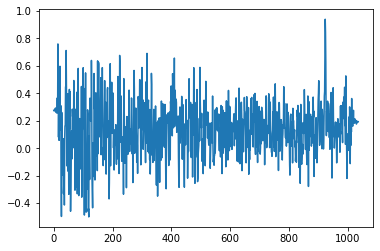

In [4]:
plt.plot(random_highz_sources[90])

In [5]:
# loading in my high confidence high z sources.
high_confidence_highz_spectra = np.load("high_confidence_highz_1000.npy", allow_pickle = True)

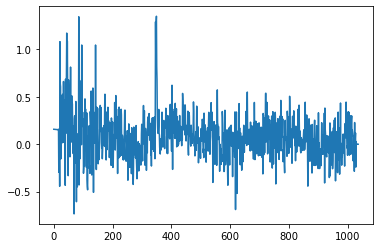

In [6]:
plt.plot(high_confidence_highz_spectra[100])

In [7]:
# loading in the noise sample.
noise_sample = np.load("noise_sample_1000.npy", allow_pickle = True)

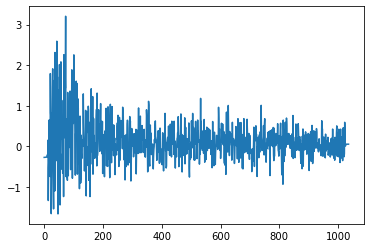

In [8]:
plt.plot(noise_sample[0])

## Random-Forest classification

https://levelup.gitconnected.com/random-forest-regression-209c0f354c84#:~:text=Random%20Forest%20Regression%20is%20a%20supervised%20learning%20algorithm%20that%20uses,prediction%20than%20a%20single%20model.

In [9]:
# importing required libraries 
# importing Scikit-learn library and datasets package
from sklearn import datasets  

https://www.datacamp.com/tutorial/random-forests-classifier-python

In [10]:
X = random_highz_sources
y = high_confidence_highz_spectra[:292]

In [11]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Create training/ test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [12]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(n_estimators=10, random_state=0)

In [13]:
Y_pred = regressor.predict(X_test)

In [14]:
Y_pred

array([[ 0.08742358,  0.08761461,  0.0878174 , ...,  0.11149979,
         0.11149583,  0.11149192],
       [ 0.02554303,  0.02548428,  0.02542442, ...,  0.1011385 ,
         0.10113838,  0.10113826],
       [-0.04789636, -0.04809619, -0.04829643, ...,  0.00826041,
         0.00826282,  0.0082652 ],
       ...,
       [-1.18283965, -1.18310914, -1.18337564, ...,  0.02242018,
         0.02242407,  0.02242793],
       [ 0.4939545 ,  0.494044  ,  0.4941477 , ...,  0.15540695,
         0.15541021,  0.15541344],
       [-1.67127583, -1.67155521, -1.67183183, ..., -0.0459769 ,
        -0.04596384, -0.0459509 ]])

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, Y_pred)

-0.16586170421622357